### 1. Exploratory Data Analysis - Terrorism
- The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover trends, identify high-risk regions, understand attack characteristics, and potentially reveal factors that contribute to terrorist activities.

#### Submitted By  Athira Prakash

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\ICTAK\DSA\data\globalterrorismdb_0718dist.csv",encoding='latin1')

In [3]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [7]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [8]:
df.head()

Year  Month  day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            City   latitude   longitude                      Attacktype  kill  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   1.0   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   0.0   
2        Unknown  15.478598  120.599741                   Assassination   1.0   
3         Athens  37.997490   23.762728               Bombing/Explosion   NaN   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   NaN   

   Wound                  target1 summary                               Group  \
0    0.0             Julio Guzman     NaN                              MANO-D   
1    0.0  Nadine Chaval, daughter     NaN  23rd of September Communist League   
2    0.0                 Employee     NaN                             Unknown   
3    NaN             U.S. Embassy     NaN                             Unknown   
4    NaN           U.S. Consulate     NaN                             Unknown   

                    Targettype      Weapon motive  
0  Private Citizens & Property     Unknown    NaN  
1      Government (Diplomatic)     Unknown    NaN  
2          Journalists & Media     Unknown    NaN  
3      Government (Diplomatic)  Explosives    NaN  
4      Government (Diplomatic)  Incendiary    NaN

In [9]:
df.shape

(181691, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [11]:
# Summary statistics for numerical columns
df.describe().T

count         mean            std           min          25%  \
Year       181691.0  2002.638997      13.259430  1.970000e+03  1991.000000   
Month      181691.0     6.467277       3.388303  0.000000e+00     4.000000   
day        181691.0    15.505644       8.814045  0.000000e+00     8.000000   
latitude   177135.0    23.498343      18.569242 -5.315461e+01    11.510046   
longitude  177134.0  -458.695653  204778.988611 -8.618590e+07     4.545640   
kill       171378.0     2.403272      11.545741  0.000000e+00     0.000000   
Wound      165380.0     3.167668      35.949392  0.000000e+00     0.000000   

                   50%          75%          max  
Year       2009.000000  2014.000000  2017.000000  
Month         6.000000     9.000000    12.000000  
day          15.000000    23.000000    31.000000  
latitude     31.467463    34.685087    74.633553  
longitude    43.246506    68.710327   179.366667  
kill          0.000000     2.000000  1570.000000  
Wound         0.000000     2.000000  8191.000000

In [12]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [13]:
df['Casualities'] = df['kill'] + df['Wound']

### Temporal Analysis

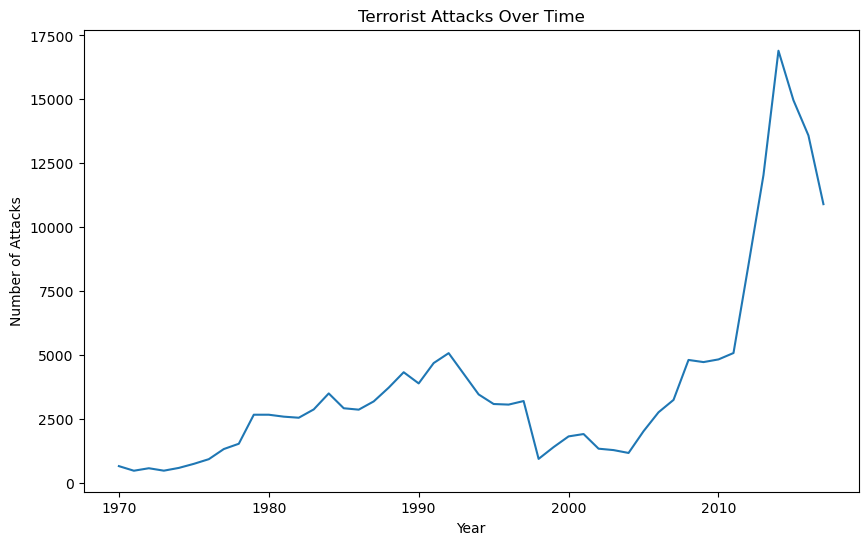

In [14]:
#Plot the number of terrorist attacks per year
attacks_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attacks Over Time')
plt.show()

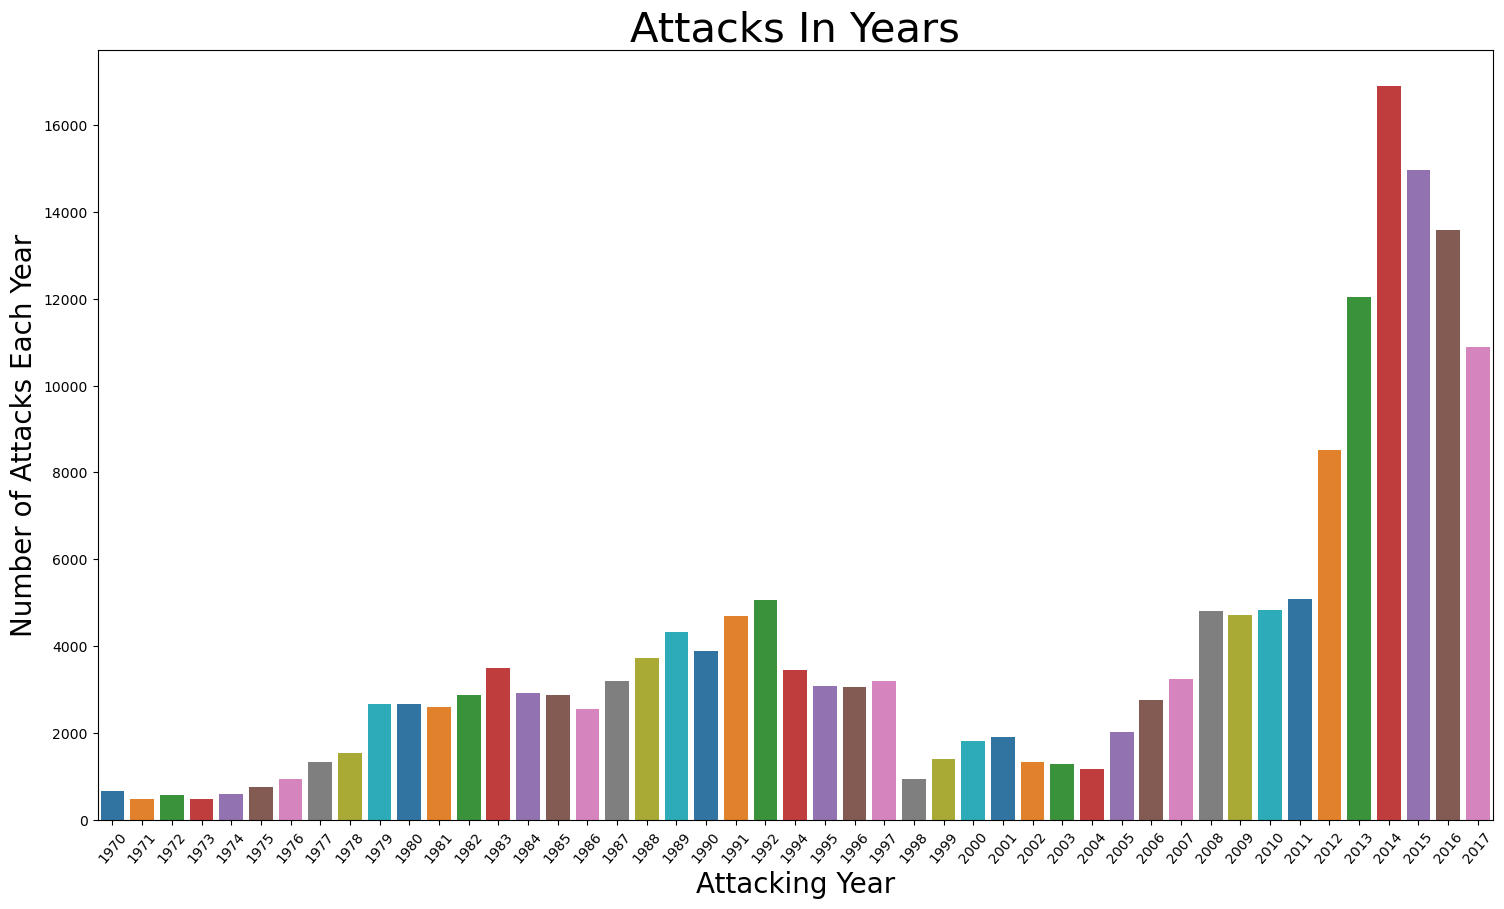

In [15]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))

sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

In [16]:
years_count[:5]



1970    651
1971    471
1972    568
1973    473
1974    581
Name: Year, dtype: int64

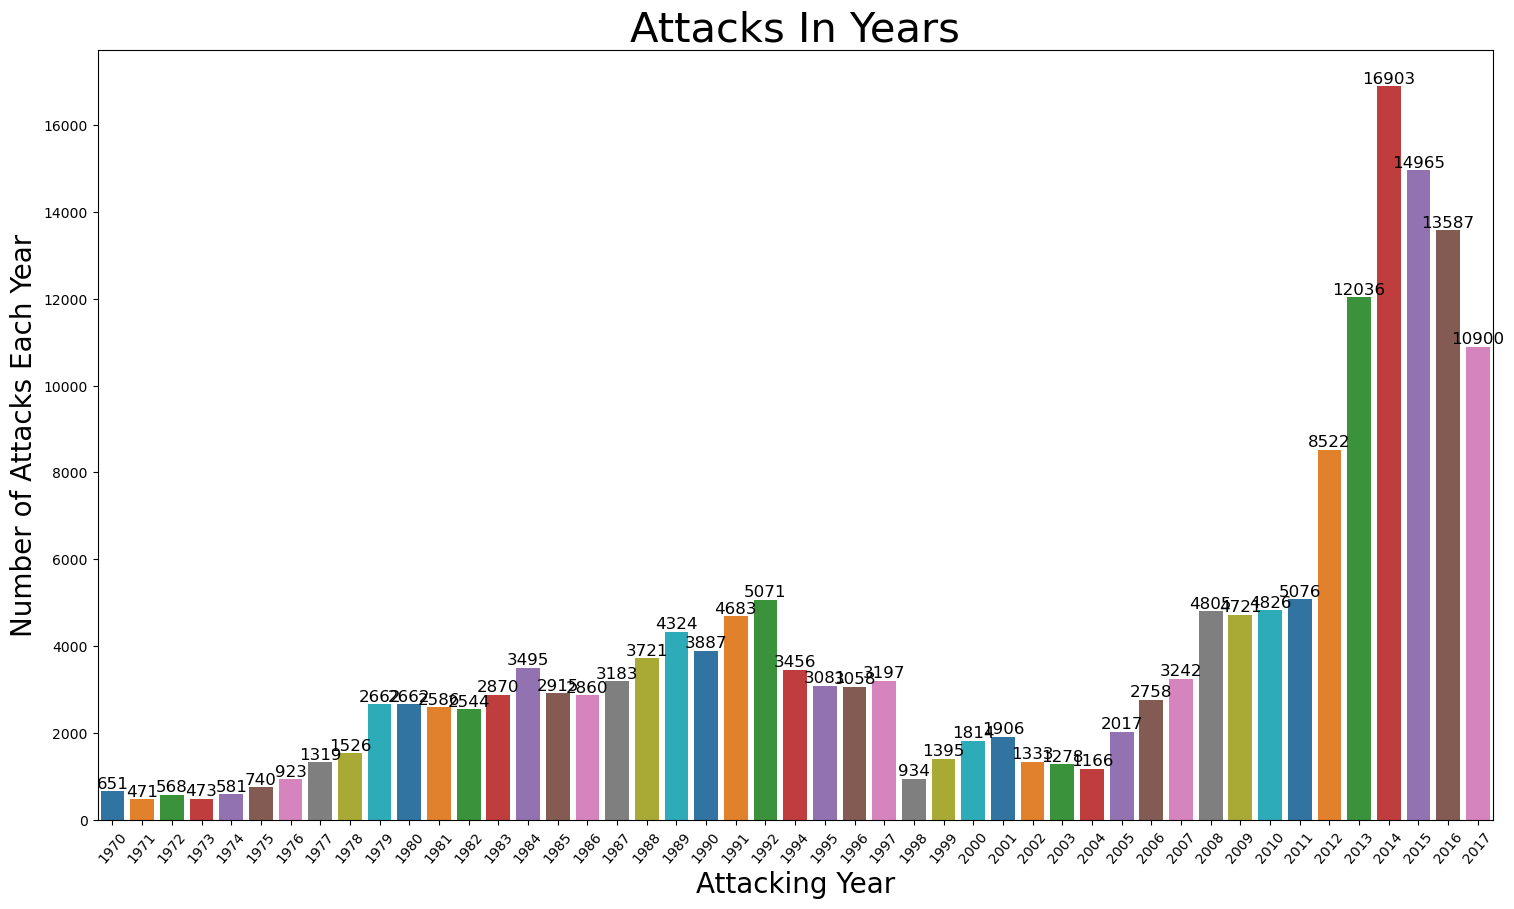

In [17]:
# Get unique years and their counts
years_count = df['Year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(18, 10))
sns.barplot(x=years_count.index, y=years_count.values, palette="tab10")

# Add count annotations to the bars
for i, count in enumerate(years_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=50)
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of Attacks Each Year', fontsize=20)
plt.title('Attacks In Years', fontsize=30)
plt.show()

### Top 5 years with most Attack happened from 1970 to 2017

- 2014
- 2015
- 2016
- 2013
- 2017

<AxesSubplot:xlabel='Month', ylabel='count'>

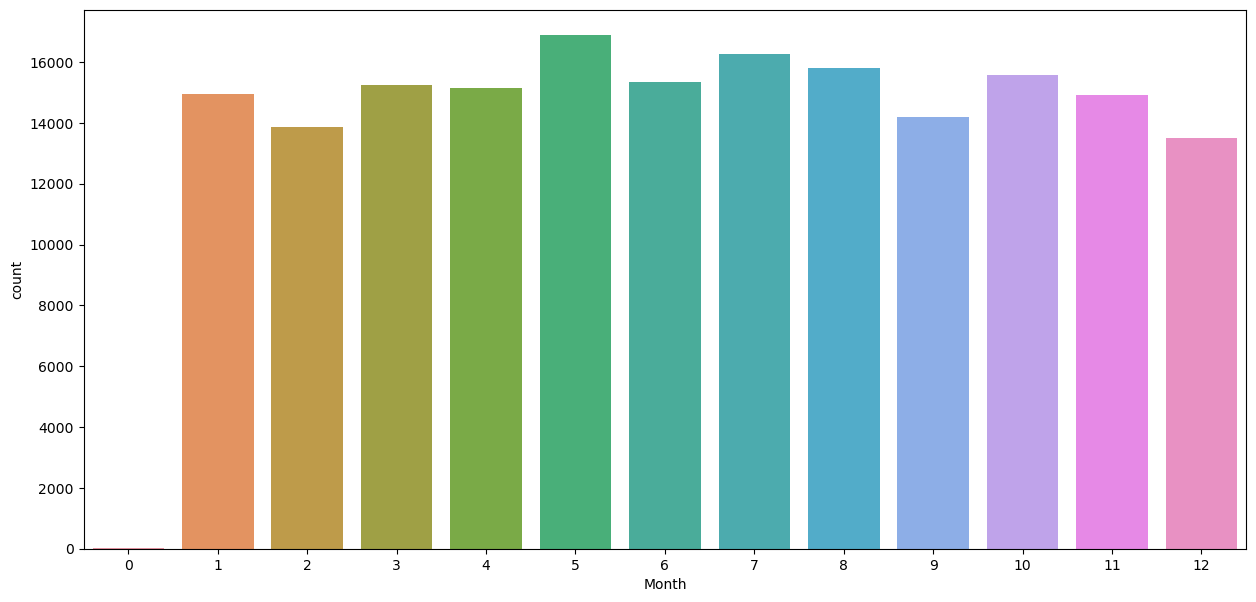

In [18]:
#incident count per month(overall)
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Month')


### Geographical Analysis

In [19]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts, 
                    locations='Country',
                    locationmode='country names',
                    color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',
                    color_continuous_scale='reds')

fig.show()

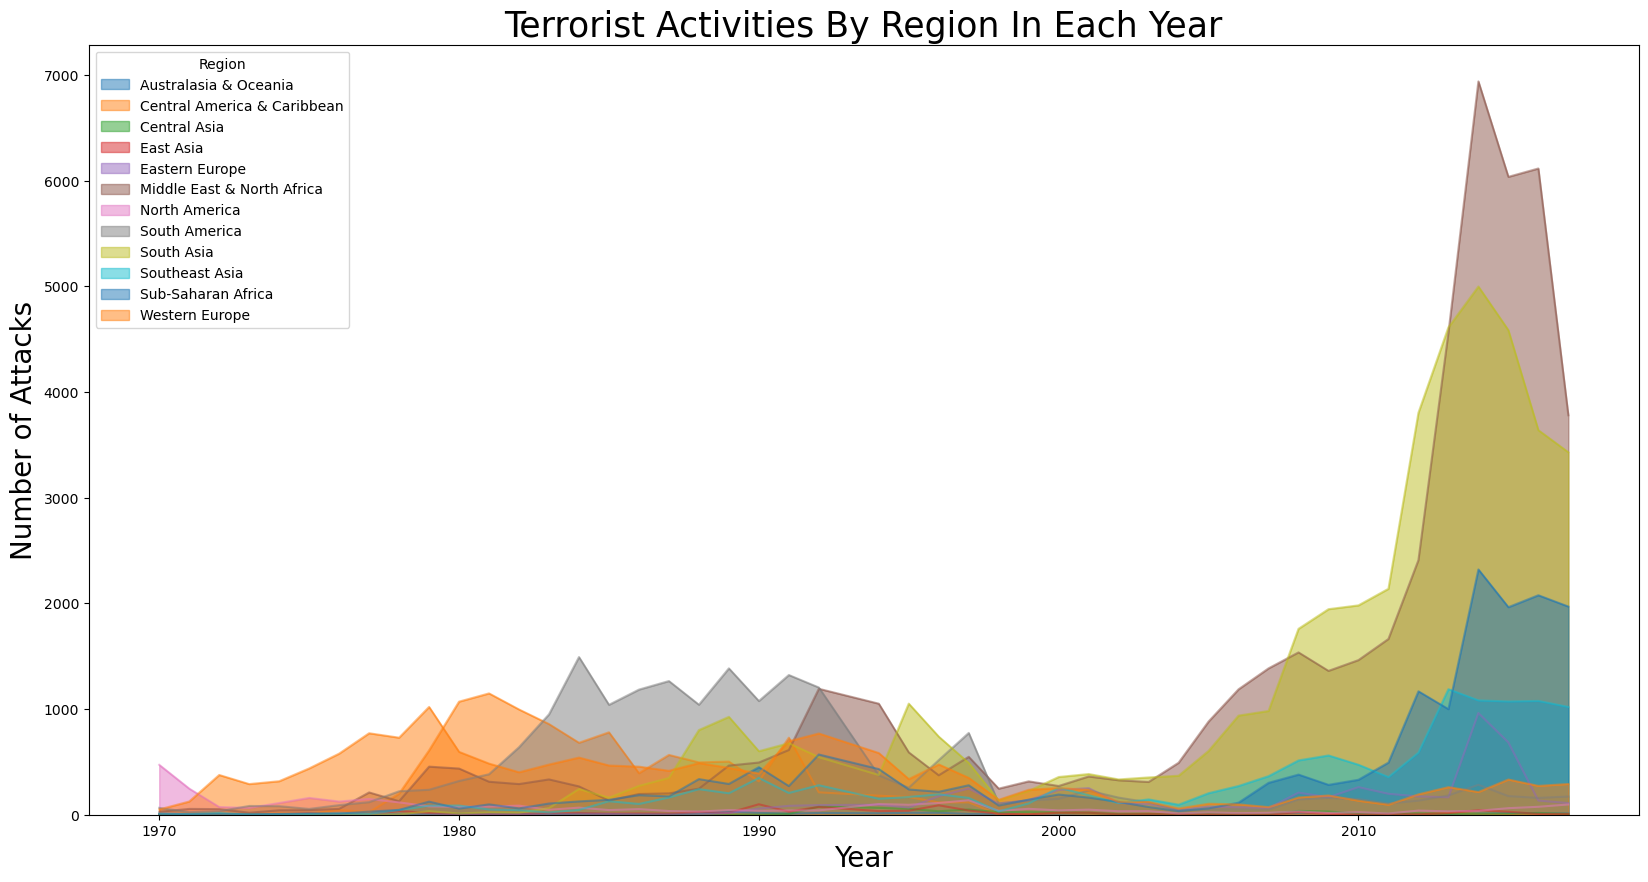

In [20]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

### High Risk Regions

In [21]:
region_group = df.groupby('Region')

In [22]:
attacks_per_region = region_group['Year'].count().sort_values(ascending=False)


In [23]:
casualties_per_region = region_group[['kill', 'Wound']].sum().sum(axis=1).sort_values(ascending=False)


In [24]:
years_with_attacks = region_group['Year'].nunique()


In [25]:
# Example: Create a risk score by combining the three metrics
risk_score = (attacks_per_region * 0.4) + (casualties_per_region * 0.3) + (years_with_attacks * 0.3)
risk_score = risk_score.sort_values(ascending=False)


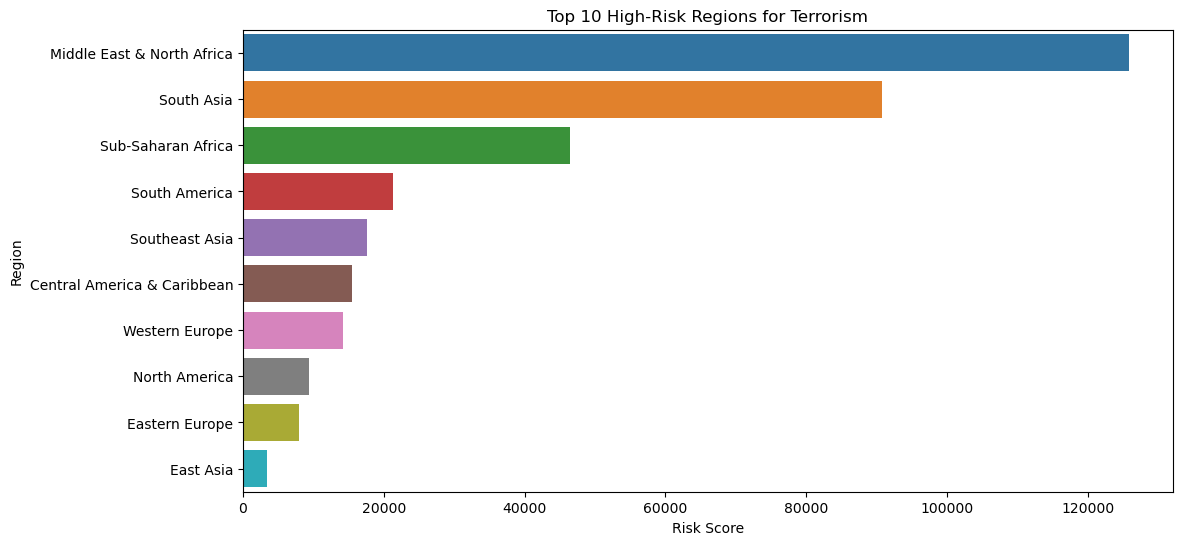

In [26]:


# Example: Plot the top N high-risk regions
N = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=risk_score.head(N), y=risk_score.head(N).index)
plt.xlabel('Risk Score')
plt.ylabel('Region')
plt.title(f'Top {N} High-Risk Regions for Terrorism')
plt.show()


### Top High Risk regions

In [27]:
risk_score.head(5)

Region
Middle East & North Africa    125788.7
South Asia                     90807.1
Sub-Saharan Africa             46407.0
South America                  21271.2
Southeast Asia                 17576.9
dtype: float64

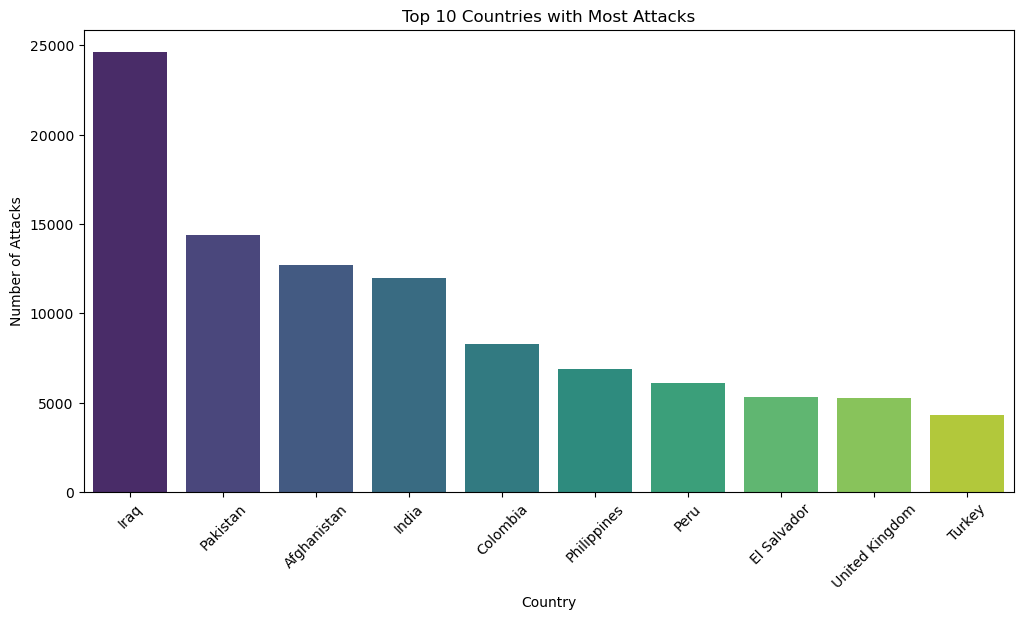

In [28]:
# Geographical Analysis
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with Most Attacks')
plt.xticks(rotation=45)
plt.show()

### Attack Characteristics

In [29]:
attack_type_counts = df['Attacktype'].value_counts()

In [30]:
weapon_type_counts = df['Weapon'].value_counts()

In [31]:
total_kills = df['kill'].sum()
total_wounds = df['Wound'].sum()

In [32]:
target_type_counts = df['Targettype'].value_counts()

In [33]:
motive_counts = df['motive'].value_counts()

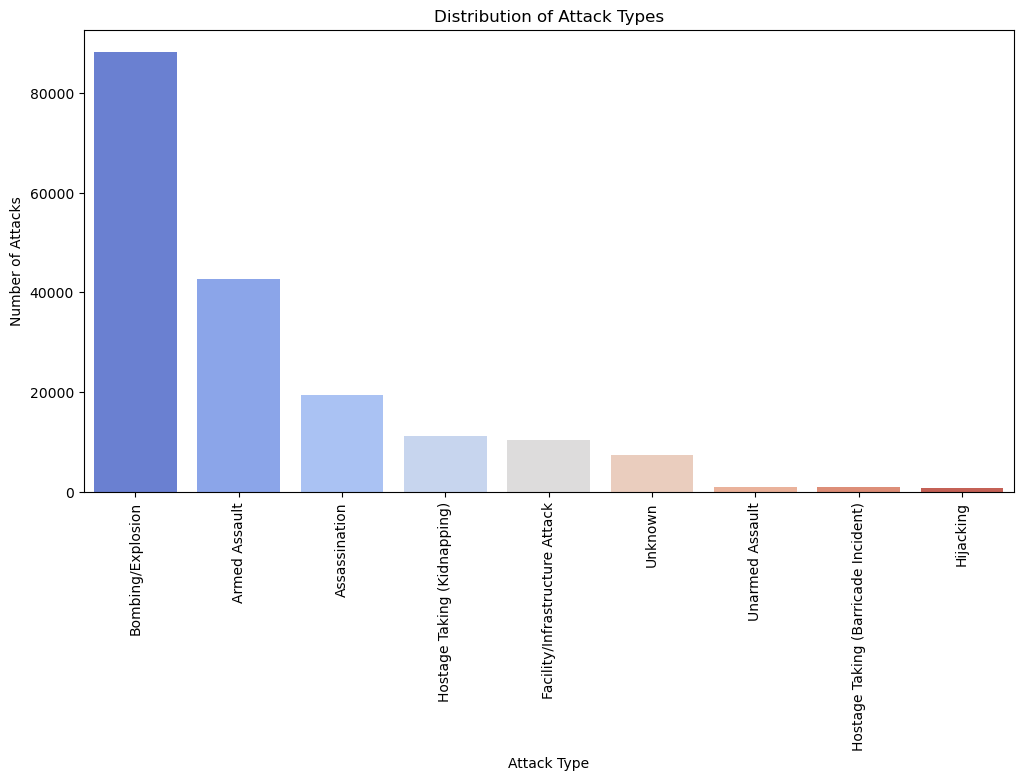

In [34]:
# Attack Characteristics
attack_types = df['Attacktype'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_types.index, y=attack_types.values, palette='coolwarm')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attack Types')
plt.xticks(rotation=90)
plt.show()

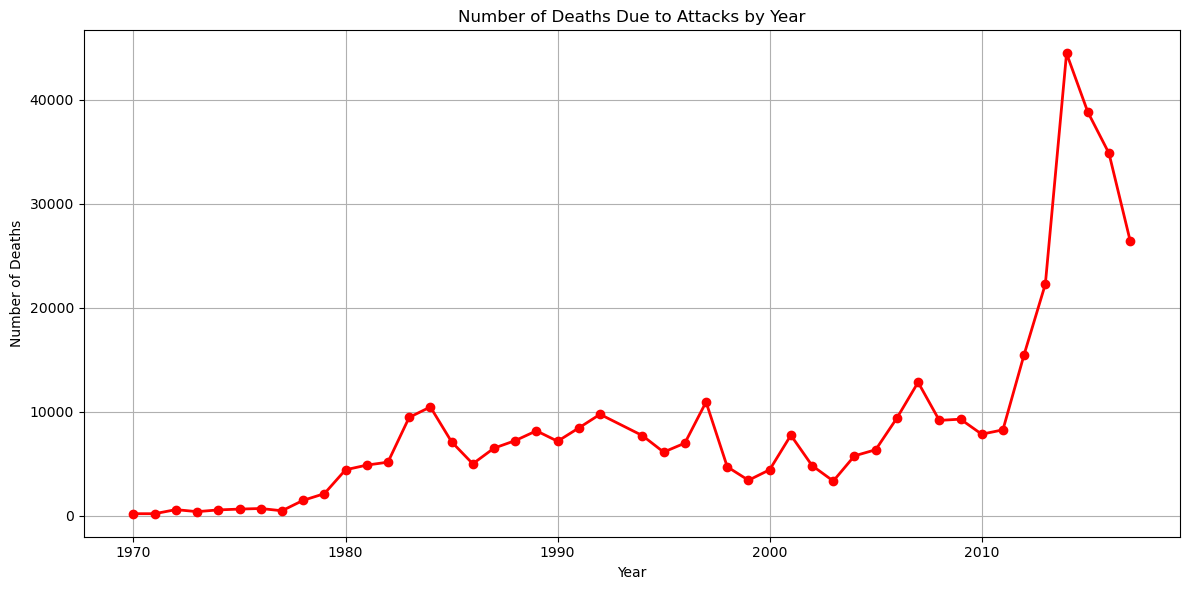

In [35]:
# Group the dataset by year and calculate the total number of deaths in each year
deaths_per_year = df.groupby('Year')['kill'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(deaths_per_year['Year'], deaths_per_year['kill'], marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths Due to Attacks by Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

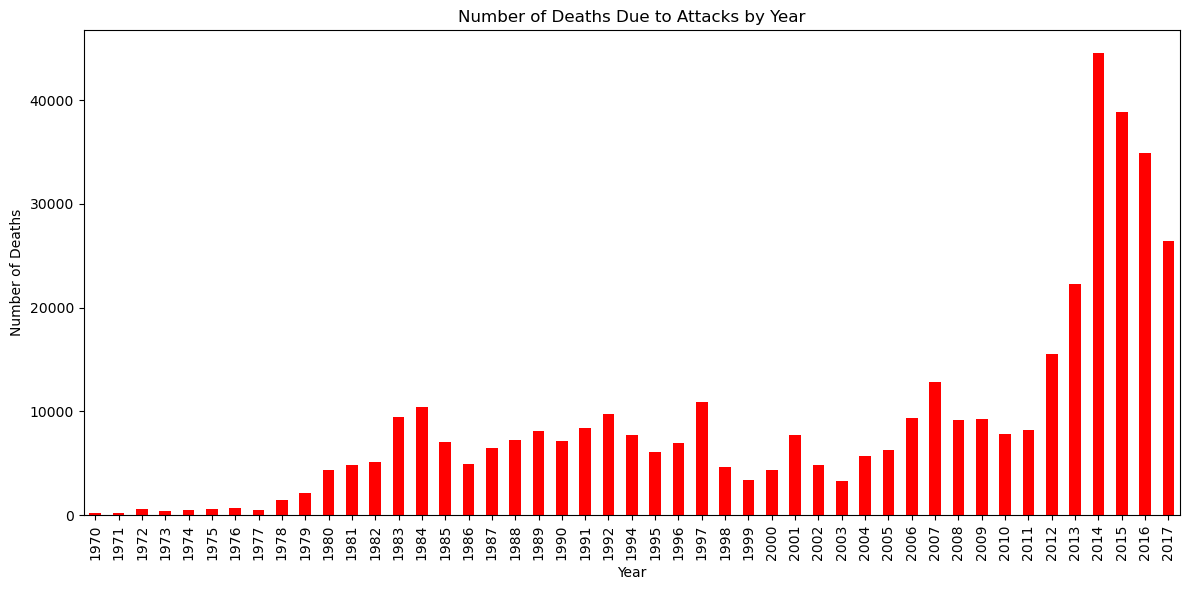

In [36]:

# Group the dataset by year and calculate the total number of deaths in each year
deaths_per_year = df.groupby('Year')['kill'].sum().reset_index()

# Set the year column as the index
deaths_per_year.set_index('Year', inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
deaths_per_year['kill'].plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths Due to Attacks by Year')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

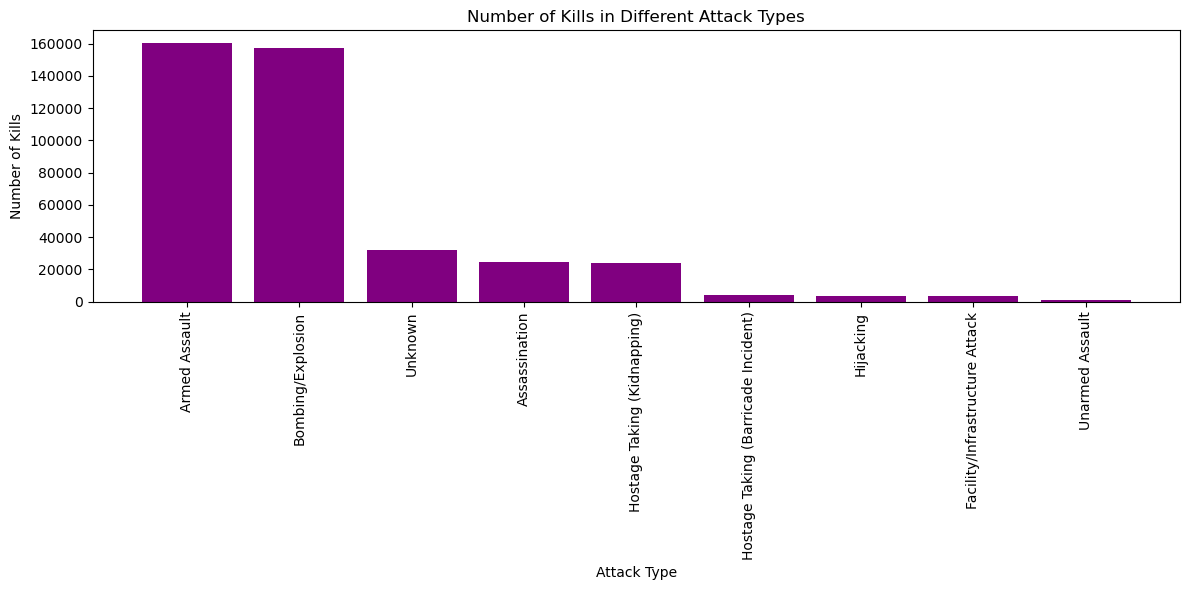

In [37]:
# Group the dataset by attack type and calculate the total number of kills in each type
kills_by_attack_type = df.groupby('Attacktype')['kill'].sum().reset_index()

# Sort the data by the number of kills in descending order
kills_by_attack_type = kills_by_attack_type.sort_values(by='kill', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(kills_by_attack_type['Attacktype'], kills_by_attack_type['kill'], color='purple')
plt.xlabel('Attack Type')
plt.ylabel('Number of Kills')
plt.title('Number of Kills in Different Attack Types')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

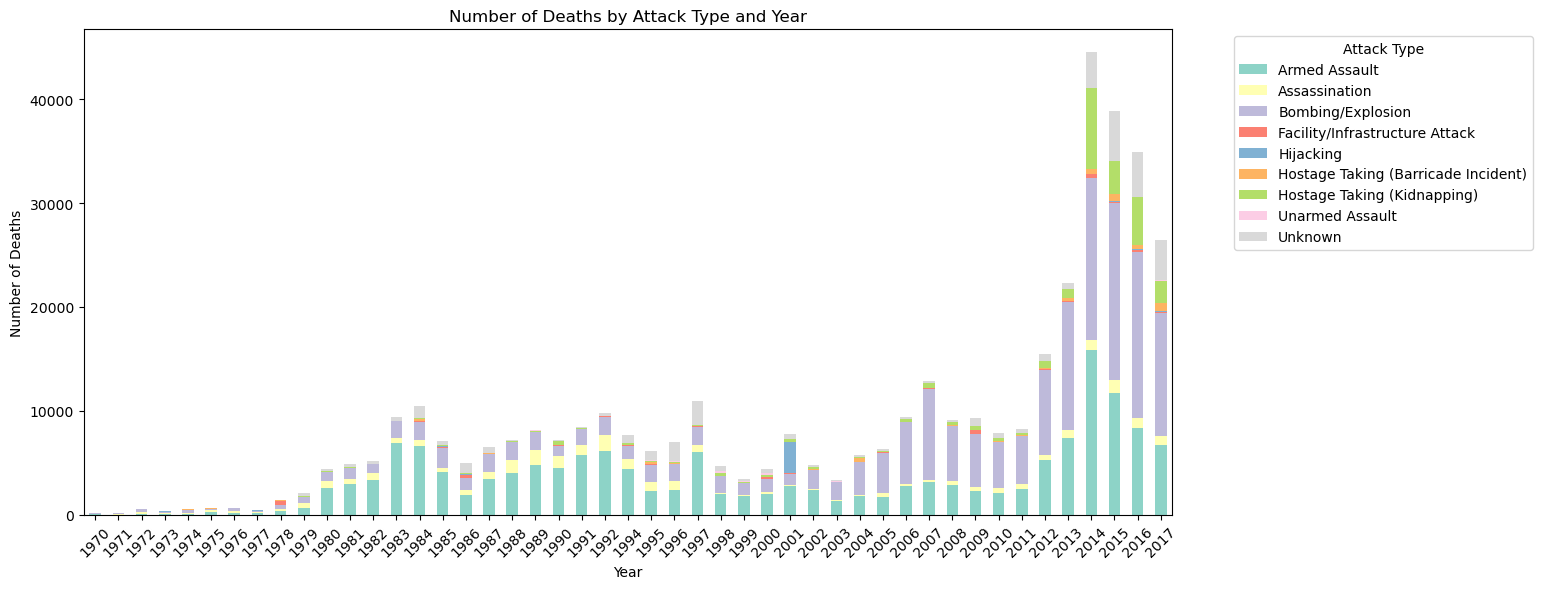

In [38]:
# Group the dataset by year and attack type and calculate the total number of deaths in each year and attack type
deaths_by_year_and_type = df.groupby(['Year', 'Attacktype'])['kill'].sum().reset_index()

# Create a pivot table for easier plotting
pivot_table = deaths_by_year_and_type.pivot_table(values='kill', index='Year', columns='Attacktype', aggfunc='sum', fill_value=0)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.set_palette("Set3")  # Use a color palette
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Attack Type and Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()







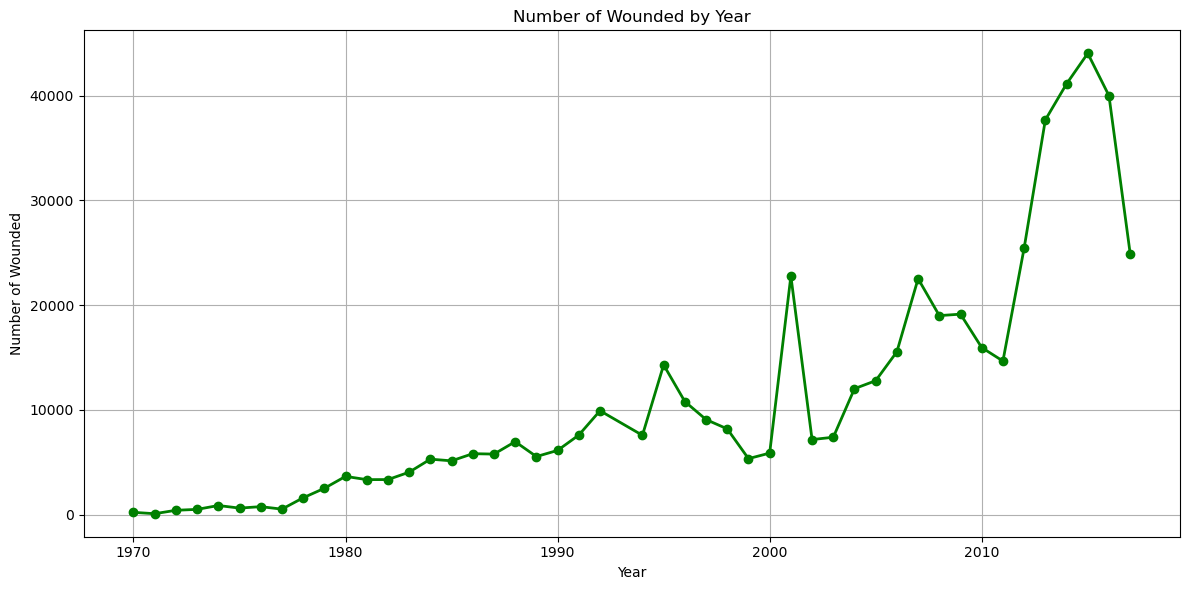

In [39]:
# Group the dataset by year and calculate the total number of wounded in each year
wounded_by_year = df.groupby('Year')['Wound'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(wounded_by_year['Year'], wounded_by_year['Wound'], marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Wounded')
plt.title('Number of Wounded by Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

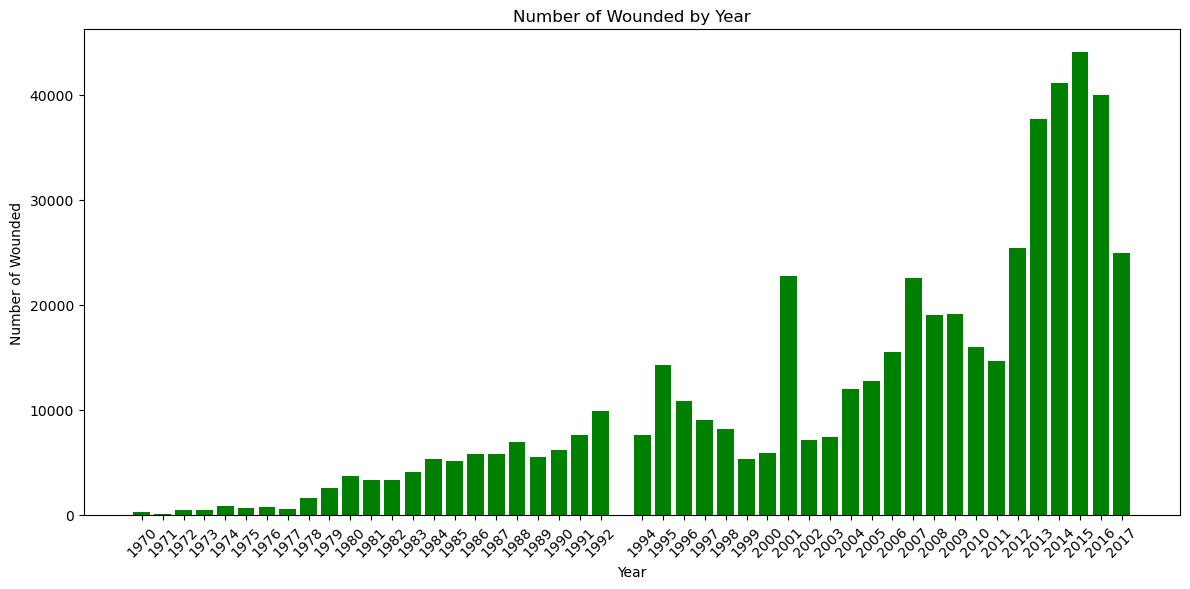

In [40]:
# Group the dataset by year and calculate the total number of wounded in each year
wounded_by_year = df.groupby('Year')['Wound'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(wounded_by_year['Year'], wounded_by_year['Wound'], color='green')
plt.xlabel('Year')
plt.ylabel('Number of Wounded')
plt.title('Number of Wounded by Year')
plt.xticks(wounded_by_year['Year'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

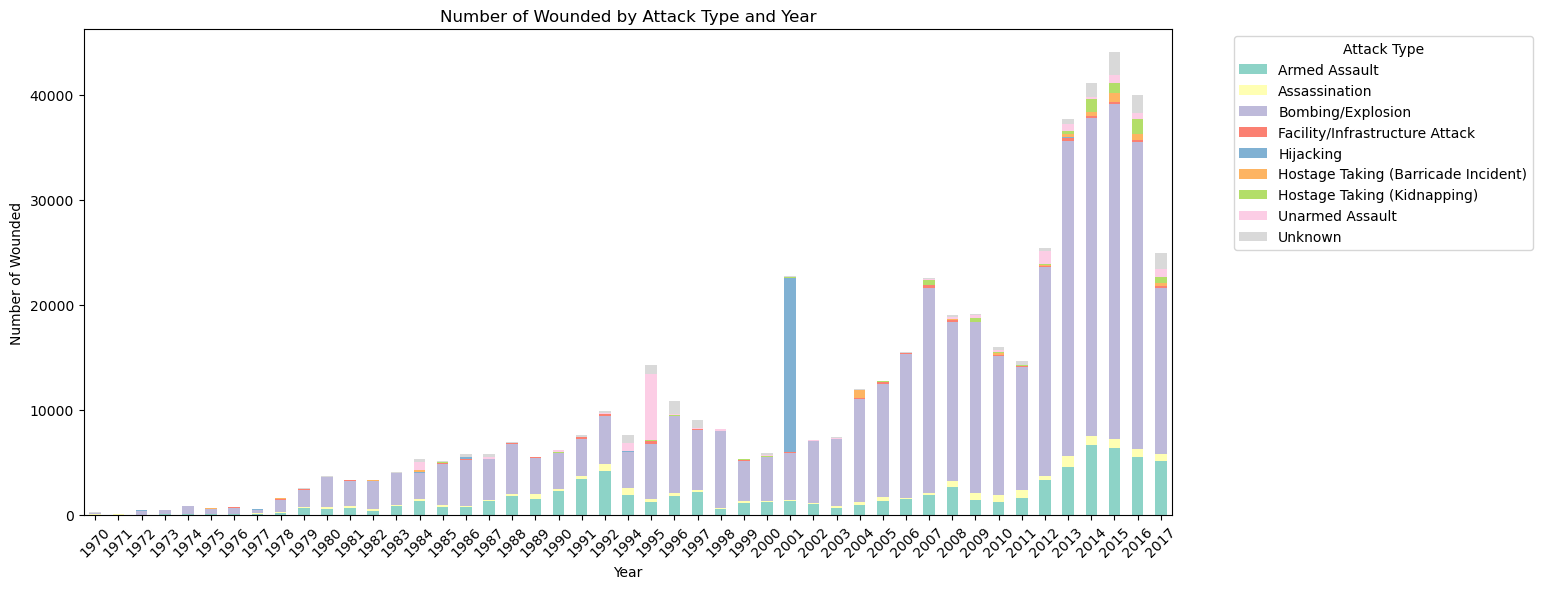

In [41]:
# Group the dataset by year and attack type and calculate the total number of wounded in each year and attack type
wounded_by_year_and_type = df.groupby(['Year', 'Attacktype'])['Wound'].sum().reset_index()

# Create a pivot table for easier plotting
pivot_table = wounded_by_year_and_type.pivot_table(values='Wound', index='Year', columns='Attacktype', aggfunc='sum', fill_value=0)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.set_palette("Set3")  # Use a color palette
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of Wounded')
plt.title('Number of Wounded by Attack Type and Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

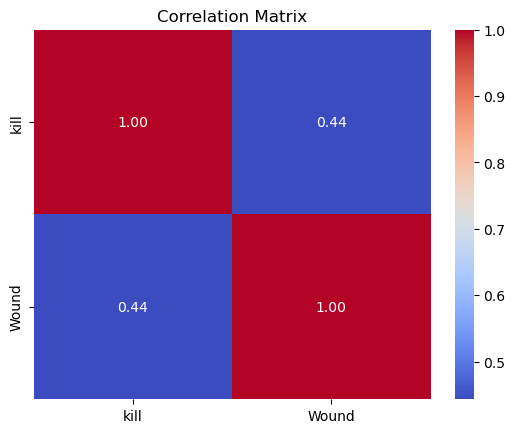

In [42]:
# Example: Explore the correlation between kills and wounds
corr_matrix = df[['kill', 'Wound']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
corr_matrix 

kill     Wound
kill   1.000000  0.443326
Wound  0.443326  1.000000

### Terrorist Groups

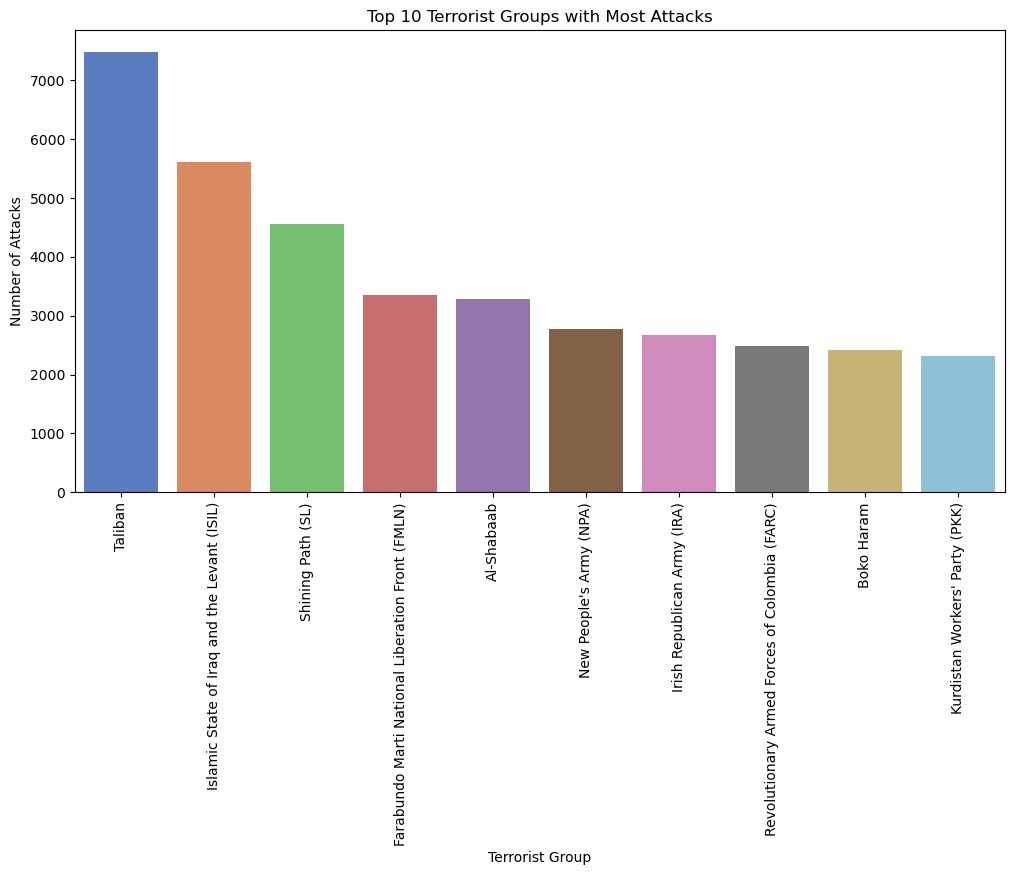

In [44]:
# Terrorist 
# Filter the dataset to exclude rows where the terrorist group is "Unknown" or unspecified
df = df[df['Group'] != 'Unknown']
top_terrorist_groups = df['Group'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_terrorist_groups.index, y=top_terrorist_groups.values, palette='muted')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Terrorist Groups with Most Attacks')
plt.xticks(rotation=90)
plt.show()

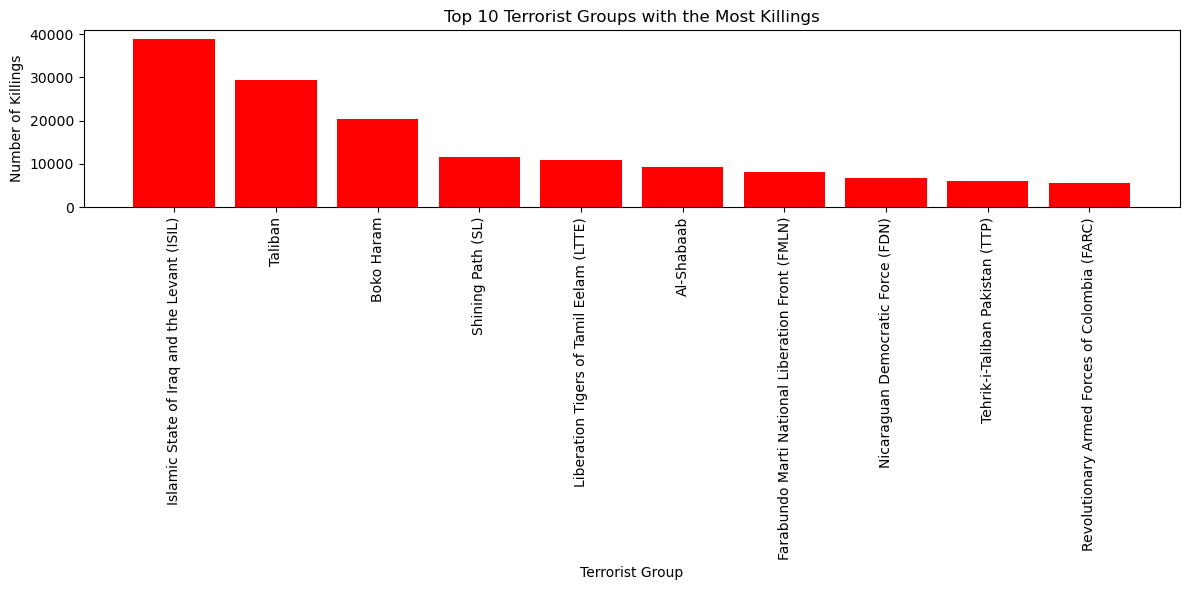

In [45]:
# Filter the dataset to exclude rows where the terrorist group is "Unknown" or unspecified
df = df[df['Group'] != 'Unknown']
# Group the dataset by terrorist group and calculate the total number of killings
killings_by_group = df.groupby('Group')['kill'].sum().reset_index()

# Sort the groups by the total number of killings in descending order
top_killing_groups = killings_by_group.sort_values(by='kill', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_killing_groups['Group'], top_killing_groups['kill'], color='red')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Killings')
plt.title('Top 10 Terrorist Groups with the Most Killings')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
data=df[['Group','Country','kill']]
data=data.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).reset_index().head(10)
data

Group      Country     kill
0       Islamic State of Iraq and the Levant (ISIL)         Iraq  31058.0
1                                           Taliban  Afghanistan  29269.0
2                                        Boko Haram      Nigeria  16917.0
3                                 Shining Path (SL)         Peru  11595.0
4           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka  10928.0
5                                        Al-Shabaab      Somalia   8176.0
6  Farabundo Marti National Liberation Front (FMLN)  El Salvador   8019.0
7       Islamic State of Iraq and the Levant (ISIL)        Syria   6883.0
8                 Nicaraguan Democratic Force (FDN)    Nicaragua   6630.0
9                   Tehrik-i-Taliban Pakistan (TTP)     Pakistan   6014.0

In [47]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype  Armed Assault  Assassination  Bombing/Explosion  \
kill             123505.0        14504.0            99545.0   

Attacktype  Facility/Infrastructure Attack  Hijacking  \
kill                                2995.0     3524.0   

Attacktype  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
kill                                     4177.0                      22171.0   

Attacktype  Unarmed Assault  Unknown  
kill                  538.0  28542.0